In [ ]:
##Importing necessary libraries
from typing import List

import matplotlib.pyplot as plt
from torchvision import io, transforms
from torchvision.utils import Image, ImageDraw
from torchvision.transforms.functional import to_pil_image

%matplotlib inline

##Creating Dataloader for Importing images in batches

In [ ]:
##Mounting drive
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
##Creating indices for training, testing and manual validation
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2', '7_12']

In [ ]:
##Creating list of images (in numpy format) for training, testing and manual validation
import os
train_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2016/')
train_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2016/')

val_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2016/')
val_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2016/')

man_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2016/')
man_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2016/')

train_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2019/')
train_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2019/')

val_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2019/')
val_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2019/')

man_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2019/')
man_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2019/')

list_train_files = []

for i in train_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2016/"+i)
  list_train_files.append(tuple_obj)

for i in train_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2019/"+i)
  list_train_files.append(tuple_obj)

list_val_files = []

for i in val_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i)
  list_val_files.append(tuple_obj)

for i in val_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i)
  list_val_files.append(tuple_obj)

list_man_files = []

for i in man_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i)
  list_man_files.append(tuple_obj)

for i in man_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i)
  list_man_files.append(tuple_obj)

In [ ]:
##Ensure the length of train: 6400 val: 1600 and manual: 192. If not, then the folder is not loaded fully. 
print(len(list_train_files))
print(len(list_val_files))
print(len(list_man_files))

6400
1600
192


In [ ]:
##Creating Dataset class to load images
IMG_SIZE = 256
PATCH_SIZE = 256
import cv2
from torch.utils.data import Dataset
from torch.utils.data import Dataset as BaseDataset
import numpy as np
from tensorflow.keras.utils import to_categorical
#from patchify import patchify
class ImageData(Dataset):
    def __init__(self, files: List[str],preprocessing=None, augmentation=None):
        self.files = files
        self.resize = transforms.Resize((IMG_SIZE, IMG_SIZE))
        self.num_patches = PATCH_SIZE * PATCH_SIZE
        self.preprocessing = preprocessing
        self.augmentation = augmentation

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        image = np.load(self.files[i][0]).astype('uint8')
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = np.load(self.files[i][1])

        mask = mask[:,:,0]
        #image = cv2.resize(image,(256,256))
        #mask = cv2.resize(mask, (256,256))
        mask = np.expand_dims(mask, axis = 2)
        mask = to_categorical(mask, num_classes = 3)
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        return (image, mask)

In [ ]:
##Create train and val datasets for visualization
train_dataset = ImageData(list_train_files)
val_dataset = ImageData(list_man_files)

In [ ]:
##Defining a function to plot images
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

(array([1, 2]), array([49204, 16332]))


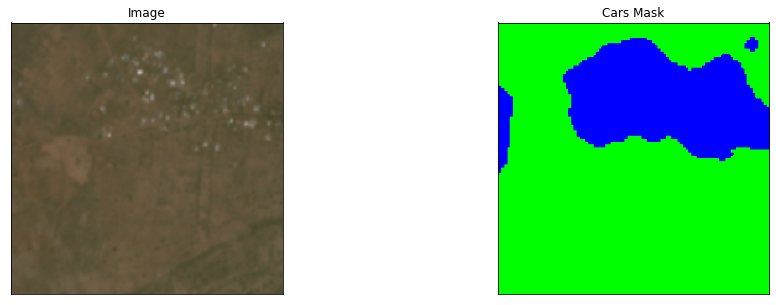

In [ ]:
##Get some sample image to visualize
image, mask = val_dataset[54] 
print(np.unique(np.argmax(mask, axis =2), return_counts=True))
visualize(
    image=image, 
    cars_mask=mask.squeeze(),
)

## Model Training

In [ ]:
##Write functions for transformations and preprocessing
import albumentations as albu
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomCrop(height=320, width=320, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    #print(x.shape)
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [ ]:
##Define model architecture
!pip install segmentation_models_pytorch
import segmentation_models_pytorch as smp
import torch
ENCODER = 'inceptionresnetv2'
ENCODER_WEIGHTS = None
CLASSES = ['water','trees','land']
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# create segmentation model with pretrained encoder

model = smp.Unet(
    encoder_name=ENCODER,
    encoder_depth=3, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES),
    decoder_channels=(128, 64, 64), 
    activation=ACTIVATION)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER)

In [ ]:
##Create data loaders for train and validation sets
from torch.utils.data import TensorDataset, DataLoader, Dataset
train_dataset = ImageData(list_train_files, preprocessing=get_preprocessing(preprocessing_fn))
val_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8)
valid_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
##Fix the loss function and optimizers
import segmentation_models_pytorch.utils.metrics
weights = torch.FloatTensor(0)
loss = smp.utils.losses.CrossEntropyLoss(weight = weights)
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.001),
])
#optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)

In [ ]:
##Training model
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [ ]:
max_score = 0

for i in range(0, 20):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, 'gdrive/MyDrive/UNET/1024_patches/best_model_full_img_inception.pth')
        print('Model saved!')
        
    if i == 3:
        optimizer.param_groups[0]['lr'] = 1e-3
        print('Decrease decoder learning rate to 1e-5!')

In [ ]:
##Loading the model
import torch
best_model = torch.load('gdrive/MyDrive/UNET/1024_patches/best_model_full_img_inception.pth')

989


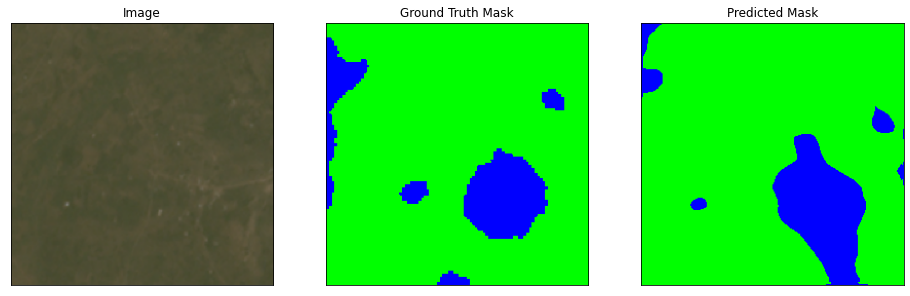

1318


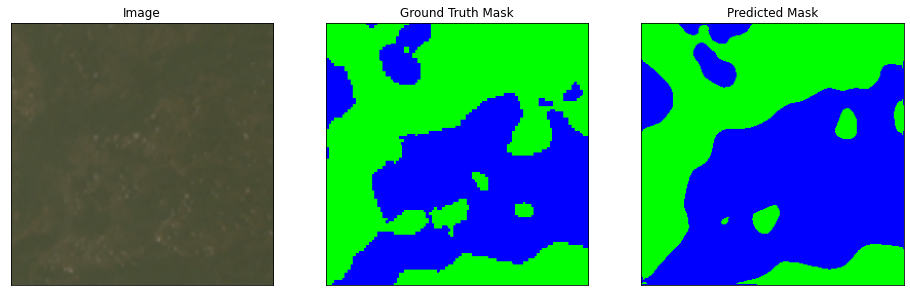

317


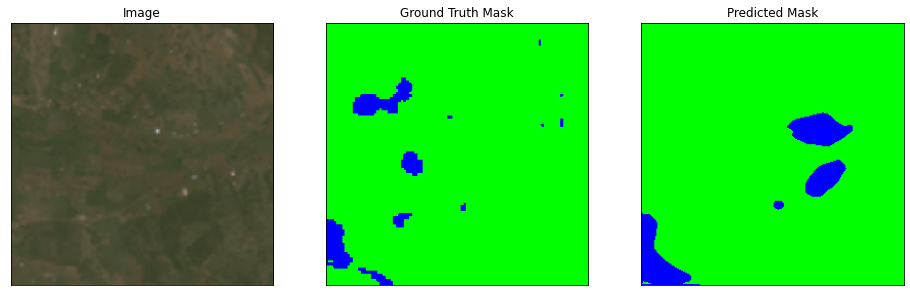

1590


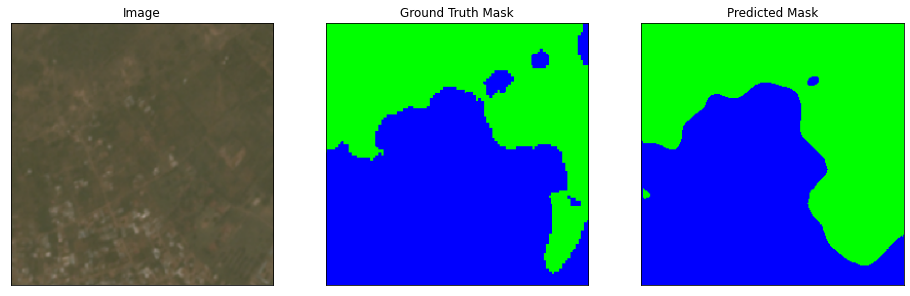

1320


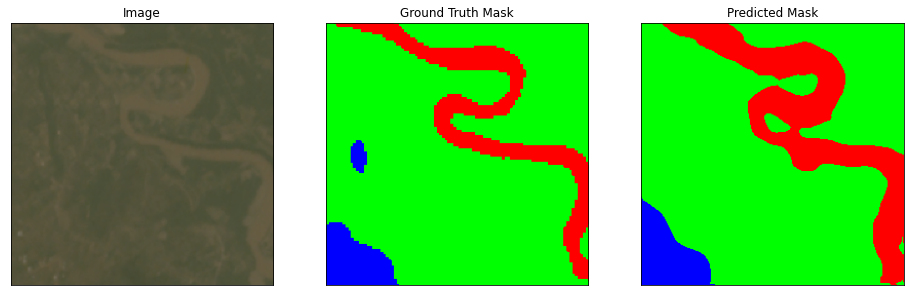

In [ ]:
##Visualizing results
test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)
#print(len(test_dataset))
for i in range(5):
    n = np.random.choice(len(test_dataset))
    print(n)
    image_vis = test_dataset_vis[n][0].astype('uint8')
    #image_vis = cv2.cvtColor(image_vis, cv2.COLOR_RGB2BGR)
    image, gt_mask = test_dataset[n]
    gt_mask = test_dataset_vis[n][1]
    gt_mask = gt_mask.squeeze()


    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    #pr_mask = np.transpose(pr_mask, (1,2,0))
    pr_mask = np.argmax(pr_mask, axis = 0)
    pr_mask = to_categorical(pr_mask, num_classes = 3)
    #print(np.unique(pr_mask, return_counts = True))
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

##Calculating results

In [ ]:
##IOU Calculation of patches
import tensorflow as tf
test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}

for i in range(len(test_dataset)):
    n = i
    print(n)
    #image_vis = test_dataset_vis[n][0].astype('uint8')
    #image_vis = cv2.cvtColor(image_vis, cv2.COLOR_RGB2BGR)
    image, gt_mask = test_dataset[n]
    gt_mask = test_dataset_vis[n][1]
    gt_mask = gt_mask.squeeze()
    
    gt_mask = np.argmax(gt_mask, axis = 2)
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    #pr_mask = np.transpose(pr_mask, (1,2,0))
    pr_mask = np.argmax(pr_mask, axis = 0)
    #pr_mask = to_categorical(pr_mask, num_classes = 3)
    
    uniq_gt = np.unique(gt_mask)
    uniq_pr = np.unique(pr_mask)

    uniq_inter = np.union1d(uniq_gt, uniq_pr)
    uniq_inter = np.unique(uniq_inter)

    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
    m.update_state(gt_mask,pr_mask)
    iou_overall.append(m.result().numpy())

    for k in uniq_inter:
      m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
      m.update_state(gt_mask,pr_mask)
      id_dict[k].append(m.result().numpy())

In [ ]:
##Priting results
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 87.77361512184143
Average IoU Land: 54.80679273605347
Average IoU Water: 34.14064347743988
Average IoU Overall: 70.15243172645569


##Training Data Results

In [ ]:
##IOU Calculation on full images 2016
import tensorflow as tf
from tensorflow.python.ops.array_ops import broadcast_args
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}
full_gt_mask_list = []
full_pr_mask_list = []
count = 0
for i in train_ind:
  print(count)
  count = count+1
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/train_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)
  
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
##IOU Calculation on full images 2019
count=0
for i in train_ind:
  print(count)
  count = count+1
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/train_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)

  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
##Priting results
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 90.74462056159973
Average IoU Land: 68.39075088500977
Average IoU Water: 36.34178042411804
Average IoU Overall: 70.52447199821472


In [ ]:
#PRECISION AND RECALL CALCULATION 2016
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.python.ops.array_ops import broadcast_args

precision_list_land = []
recall_list_land = []

precision_list_trees = []
recall_list_trees = []

precision_list_water = []
recall_list_water = []

accuracy_overall = []

count =0
for i in range(len(full_gt_mask_list)):
  full_gt_mask = full_gt_mask_list[i]
  full_pr_mask = full_pr_mask_list[i]

  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])


In [ ]:
##Printing results
from statistics import mean
print("Average Impervios Precision:", mean(precision_list_land)*100)
print("Average Impervios Recall:", mean(recall_list_land)*100)
print("Average Tree Canopy Precision:", mean(precision_list_trees)*100)
print("Average Tree Canopy Recall:", mean(recall_list_trees)*100)
print("Average Water Precision:", mean(precision_list_water)*100)
print("Average Water Recall:", mean(recall_list_water)*100)
print("Average Accuracy:", mean(accuracy_overall)*100)

Average Impervios Precision: 77.66553611080039
Average Impervios Recall: 83.46324680679724
Average Tree Canopy Precision: 96.34387992177801
Average Tree Canopy Recall: 93.91667132377276
Average Water Precision: 42.87909442849262
Average Water Recall: 41.286872647585554
Average Accuracy: 93.41690516471863


### Validation Data

In [ ]:
##IOU Calculation on full images 2016
import tensorflow as tf
from tensorflow.python.ops.array_ops import broadcast_args
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}
full_gt_mask_list = []
full_pr_mask_list = []

for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)
  
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
##IOU Calculation on full images 2019
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)

  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
##Priting results
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 89.23583030700684
Average IoU Land: 62.97076940536499
Average IoU Water: 29.412755370140076
Average IoU Overall: 65.76251983642578


####Calculating Class Distribution

In [ ]:
water_count = []
land_count = []
tree_count = []

for i in range(len(full_gt_mask_list)):
  full_gt_mask = full_gt_mask_list[i]
  uniq_counts = np.unique(full_gt_mask, return_counts = True)
  for i in range(len(uniq_counts[0])):
    if uniq_counts[0][i] == 0:
      water_count.append(uniq_counts[1][i]/np.sum(uniq_counts[1]))
    elif uniq_counts[0][i] == 1:
      tree_count.append(uniq_counts[1][i]/np.sum(uniq_counts[1]))
    elif uniq_counts[0][i] == 2:
      land_count.append(uniq_counts[1][i]/np.sum(uniq_counts[1]))

In [ ]:
from statistics import mean
print("Average Tree Count:", mean(tree_count)*100)
print("Average Land Count:", mean(land_count)*100)
print("Average Water Count:", mean(water_count)*100)

Average Tree Count: 77.26837980980966
Average Land Count: 21.499951680501304
Average Water Count: 2.512603759765625


69


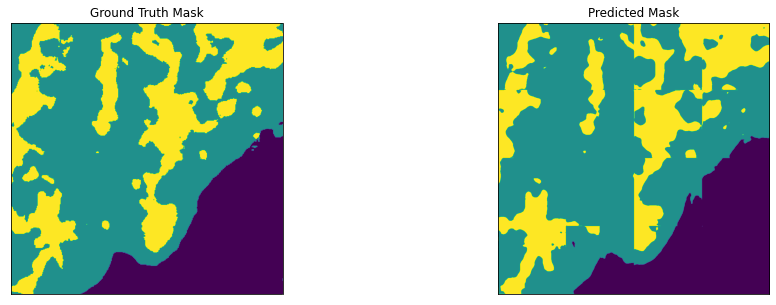

90


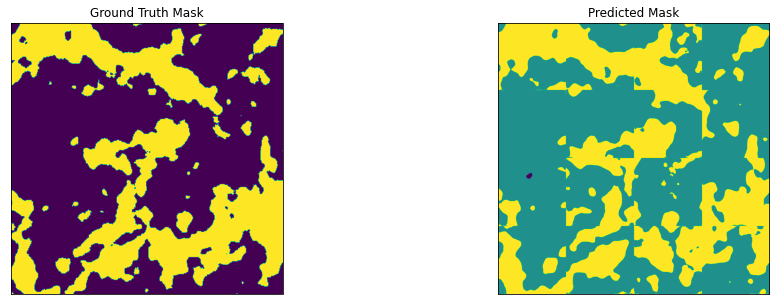

74


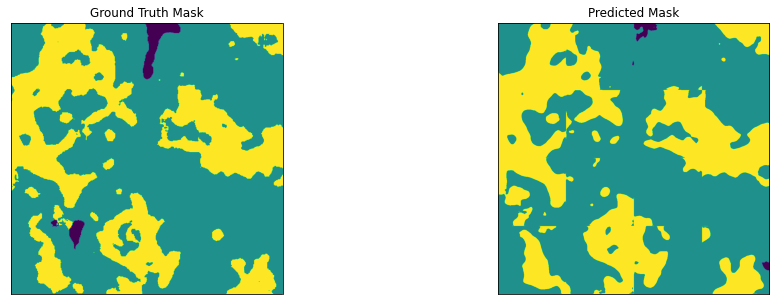

21


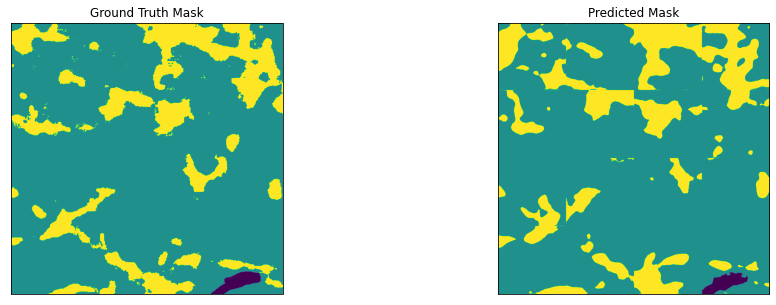

25


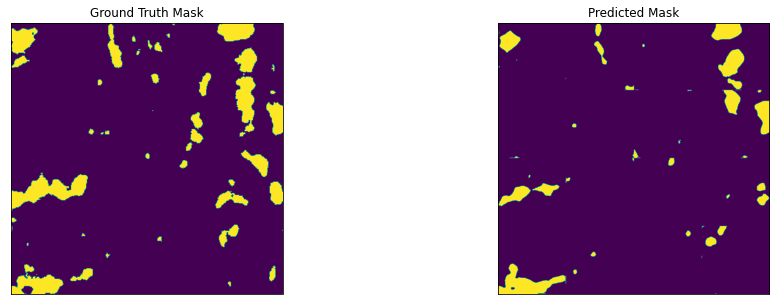

In [ ]:
##Visulazing predictions of full images
for i in range(5):
    n = np.random.choice(len(full_gt_mask_list))
    print(n)
    ground_truth_mask = full_gt_mask_list[n]
    predicted_mask = full_pr_mask_list[n]
    visualize( 
        ground_truth_mask=ground_truth_mask.squeeze(), 
        predicted_mask=predicted_mask.squeeze()
    )

In [ ]:
#PRECISION AND RECALL CALCULATION 2016
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.python.ops.array_ops import broadcast_args

test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)


train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []

precision_list_trees = []
recall_list_trees = []

precision_list_water = []
recall_list_water = []

accuracy_overall = []


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  

  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])


In [ ]:
#PRECISION AND RECALL CALCULATION 2019:
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])


In [ ]:
##Printing results
from statistics import mean
print("Average Impervios Precision:", mean(precision_list_land)*100)
print("Average Impervios Recall:", mean(recall_list_land)*100)
print("Average Tree Canopy Precision:", mean(precision_list_trees)*100)
print("Average Tree Canopy Recall:", mean(recall_list_trees)*100)
print("Average Water Precision:", mean(precision_list_water)*100)
print("Average Water Recall:", mean(recall_list_water)*100)
print("Average Accuracy:", mean(accuracy_overall)*100)

Average Impervios Precision: 75.34036308912052
Average Impervios Recall: 78.34599844097768
Average Tree Canopy Precision: 95.2325111313043
Average Tree Canopy Recall: 93.34326302043043
Average Water Precision: 35.333401660525574
Average Water Recall: 33.67058183087551
Average Accuracy: 92.09494497261795


In [ ]:
##IOU Calculation for land cover change
import tensorflow as tf
iou_tree_loss = []
iou_tree_gain = []
iou_land_loss = []
iou_land_gain = []
iou_water_loss = []
iou_water_gain = []
iou_no_change = []
iou_overall_loss = []
iou_overall_gain = []

id_dict_loss = {0:iou_no_change, 1: iou_water_loss, 2: iou_tree_loss, 3: iou_land_loss}
id_dict_gain = {0:iou_no_change, 1: iou_water_gain, 2: iou_tree_gain, 3: iou_land_gain}


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  
  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_true,modified_image_2016_pred)
  iou_overall_loss.append(m.result().numpy())
  
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_true,modified_image_2016_pred)
    id_dict_loss[k].append(m.result().numpy())


  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_true,modified_image_2019_pred)
  iou_overall_gain.append(m.result().numpy())
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_true,modified_image_2019_pred)
    id_dict_gain[k].append(m.result().numpy())

In [ ]:
##Priting results
from statistics import mean
print("Average IoU Land Loss:", mean(iou_land_loss)*100)
print("Average IoU Water Loss:", mean(iou_water_loss)*100)
print("Average IoU Tree Loss:", mean(iou_tree_loss)*100)
print("Average IoU Land Gain:", mean(iou_land_gain)*100)
print("Average IoU Water Gain:", mean(iou_water_gain)*100)
print("Average IoU Tree Gain:", mean(iou_tree_gain)*100)
print("Average IoU Overall Loss:", mean(iou_overall_loss)*100)
print("Average IoU overall Gain:", mean(iou_overall_gain)*100)

Average IoU Land Loss: 4.4983841478824615
Average IoU Water Loss: 5.883699655532837
Average IoU Tree Loss: 32.38186538219452
Average IoU Land Gain: 32.50760734081268
Average IoU Water Gain: 5.182953923940659
Average IoU Tree Gain: 5.293609946966171
Average IoU Overall Loss: 15.727604925632477
Average IoU overall Gain: 15.797336399555206


In [ ]:
#PRECISION AND RECALL CALCULATION FOR LANDCOVER CHANGE
from sklearn.metrics import classification_report
precision_list_land_loss = []
recall_list_land_loss = []

precision_list_trees_loss = []
recall_list_trees_loss = []

precision_list_water_loss = []
recall_list_water_loss = []

accuracy_overall_loss = []

precision_list_land_gain = []
recall_list_land_gain = []

precision_list_trees_gain = []
recall_list_trees_gain = []

precision_list_water_gain = []
recall_list_water_gain = []

accuracy_overall_gain = []



for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  modified_image_2016_true_1d = np.reshape(modified_image_2016_true, (1024*1024))
  modified_image_2016_pred_1d = np.reshape(modified_image_2016_pred, (1024*1024))

  report = classification_report(modified_image_2016_true_1d, modified_image_2016_pred_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_loss.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_loss.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_loss.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_loss.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_loss.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_loss.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss.append(report['accuracy'])

  modified_image_2019_true_1d = np.reshape(modified_image_2019_true, (1024*1024))
  modified_image_2019_pred_1d = np.reshape(modified_image_2019_pred, (1024*1024))

  report = classification_report(modified_image_2019_true_1d, modified_image_2019_pred_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_gain.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_gain.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_gain.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_gain.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_gain.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_gain.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain.append(report['accuracy'])

In [ ]:
##Printing results
from statistics import mean
print("Average Precision Land loss:", mean(precision_list_land_loss)*100)
print("Average Precision Water loss:", mean(precision_list_water_loss)*100)
print("Average Precision Trees loss:", mean(precision_list_trees_loss)*100)
print("Average Recall Land loss:", mean(recall_list_land_loss)*100)
print("Average Recall Water loss:", mean(recall_list_water_loss)*100)
print("Average Recall Trees loss:", mean(recall_list_trees_loss)*100)
print("Average Accuracy Overall loss:", mean(accuracy_overall_loss)*100)

Average Precision Land loss: 8.192597337518885
Average Precision Water loss: 9.07473092017562
Average Precision Trees loss: 50.74575728091757
Average Recall Land loss: 11.541633277858374
Average Recall Water loss: 12.120075160447353
Average Recall Trees loss: 48.173914631997675
Average Accuracy Overall loss: 87.25451488120883


In [ ]:
##Priting results
print("Average Precision Land gain:", mean(precision_list_land_gain)*100)
print("Average Precision Water gain:", mean(precision_list_water_gain)*100)
print("Average Precision Trees gain:", mean(precision_list_trees_gain)*100)
print("Average Recall Land gain:", mean(recall_list_land_gain)*100)
print("Average Recall Water gain:", mean(recall_list_water_gain)*100)
print("Average Recall Trees gain:", mean(recall_list_trees_gain)*100)
print("Average Accuracy Overall gain:", mean(accuracy_overall_gain)*100)

Average Precision Land gain: 51.14049821657807
Average Precision Water gain: 7.895979151604343
Average Precision Trees gain: 9.53704796261983
Average Recall Land gain: 48.13871473703899
Average Recall Water gain: 10.44769713814202
Average Recall Trees gain: 12.861894713301977
Average Accuracy Overall gain: 87.25299835205078


## MANUAL VALIDATION

In [ ]:
#Creating manual mask list of arrays 2016
from tensorflow.python.ops.array_ops import broadcast_args
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2','7_12']


iou_score_land = []
iou_score_trees = []
iou_score_water = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}

full_gt_mask_list = []
full_pr_mask_list = []
full_man_mask_list = []


for i in manual_ind:
  a = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2016/'+i+'.npy')
  a = a[:,:,0]
  a = np.expand_dims(a, axis = 2)
  full_man_mask_list.append(a)


for i in manual_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)

In [ ]:
#Creating manual mask list of arrays 2019
for i in manual_ind:
  a = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2019/'+i+'.npy')
  a = a[:,:,0]
  a = np.expand_dims(a, axis = 2)
  full_man_mask_list.append(a)


for i in manual_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)

In [ ]:
##Calculating IOU Scores
import tensorflow as tf
iou_score_land_gt_man = []
iou_score_trees_gt_man = []
iou_score_water_gt_man = []

accuracy_overall_gt_man = []
iou_overall_gt_man = []
id_dict_gt_man = {0: iou_score_water_gt_man, 1: iou_score_trees_gt_man, 2: iou_score_land_gt_man}

iou_score_land_pr_man = []
iou_score_trees_pr_man = []
iou_score_water_pr_man = []

accuracy_overall_pr_man = []
iou_overall_pr_man = []
id_dict_pr_man = {0: iou_score_water_pr_man, 1: iou_score_trees_pr_man, 2: iou_score_land_pr_man}

for i in range(len(full_gt_mask_list)):

  full_gt_mask = full_gt_mask_list[i]
  full_pr_mask = full_pr_mask_list[i]
  full_man_mask = full_man_mask_list[i]

  uniq_man = np.unique(full_man_mask)
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_man)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_man_mask)
  iou_overall_gt_man.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_man_mask)
    id_dict_gt_man[k].append(m.result().numpy())

  uniq_inter = np.union1d(uniq_pr, uniq_man)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_pr_mask,full_man_mask)
  iou_overall_pr_man.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_pr_mask,full_man_mask)
    id_dict_pr_man[k].append(m.result().numpy())

In [ ]:
##Printing results
from statistics import mean
print("Average IoU Trees GT MAN:", mean(iou_score_trees_gt_man)*100)
print("Average IoU Land GT MAN:", mean(iou_score_land_gt_man)*100)
print("Average IoU Water GT MAN:", mean(iou_score_water_gt_man)*100)
print("Average IoU Overall GT MAN:", mean(iou_overall_gt_man)*100)

print("Average IoU Trees PR MAN:", mean(iou_score_trees_pr_man)*100)
print("Average IoU Land PR MAN:", mean(iou_score_land_pr_man)*100)
print("Average IoU Water PR MAN:", mean(iou_score_water_pr_man)*100)
print("Average IoU Overall PR MAN:", mean(iou_overall_pr_man)*100)

Average IoU Trees GT MAN: 75.9703278541565
Average IoU Land GT MAN: 14.614568650722504
Average IoU Water GT MAN: 8.566717803478241
Average IoU Overall GT MAN: 40.74619114398956
Average IoU Trees PR MAN: 75.07725954055786
Average IoU Land PR MAN: 15.030622482299805
Average IoU Water PR MAN: 11.969329416751862
Average IoU Overall PR MAN: 41.45480692386627


In [ ]:
##Precision and Recall Calculation
from sklearn.metrics import classification_report
precision_list_land_gt_man = []
recall_list_land_gt_man = []

precision_list_trees_gt_man = []
recall_list_trees_gt_man = []

precision_list_water_gt_man = []
recall_list_water_gt_man = []

accuracy_overall_gt_man = []

precision_list_land_pr_man = []
recall_list_land_pr_man = []

precision_list_trees_pr_man = []
recall_list_trees_pr_man = []

precision_list_water_pr_man = []
recall_list_water_pr_man = []

accuracy_overall_pr_man = []


for i in range(len(full_gt_mask_list)):

  full_gt_mask = full_gt_mask_list[i]
  full_pr_mask = full_pr_mask_list[i]
  full_man_mask = full_man_mask_list[i]

  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))
  full_man_mask_1d = np.reshape(full_man_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_man_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_gt_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees_gt_man.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water_gt_man.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land_gt_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees_gt_man.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water_gt_man.append(report['0']['recall'])
  except:
    pass

  accuracy_overall_gt_man.append(report['accuracy'])
  
  report = classification_report(full_pr_mask_1d, full_man_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_pr_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees_pr_man.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water_pr_man.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land_pr_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees_pr_man.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water_pr_man.append(report['0']['recall'])
  except:
    pass

  accuracy_overall_pr_man.append(report['accuracy'])

In [ ]:
##Printing results
from statistics import mean
print("Average Precision Trees GT MAN:", mean(precision_list_trees_gt_man)*100)
print("Average Precision Land GT MAN:", mean(precision_list_land_gt_man)*100)
print("Average Precision Water GT MAN:", mean(precision_list_water_gt_man)*100)

print("Average Recall Trees GT MAN:", mean(recall_list_trees_gt_man)*100)
print("Average Recall Land GT MAN:", mean(recall_list_land_gt_man)*100)
print("Average Recall Water GT MAN:", mean(recall_list_water_gt_man)*100)

print("Average Accuracy GT MAN:", mean(accuracy_overall_gt_man)*100)


print("Average Precision Trees PR MAN:", mean(precision_list_trees_pr_man)*100)
print("Average Precision Land PR MAN:", mean(precision_list_land_pr_man)*100)
print("Average Precision Water PR MAN:", mean(precision_list_water_pr_man)*100)

print("Average Recall Trees PR MAN:", mean(recall_list_trees_pr_man)*100)
print("Average Recall Land PR MAN:", mean(recall_list_land_pr_man)*100)
print("Average Recall Water PR MAN:", mean(recall_list_water_pr_man)*100)

print("Average Accuracy PR MAN:", mean(accuracy_overall_pr_man)*100)

Average Precision Trees GT MAN: 82.65992231088619
Average Precision Land GT MAN: 32.17703811068747
Average Precision Water GT MAN: 15.389812847601917
Average Recall Trees GT MAN: 89.99116674037072
Average Recall Land GT MAN: 20.62614601491604
Average Recall Water GT MAN: 13.352812841564399
Average Accuracy GT MAN: 77.24952697753906
Average Precision Trees PR MAN: 81.3783740513696
Average Precision Land PR MAN: 35.03228067152917
Average Precision Water PR MAN: 23.61441857635905
Average Recall Trees PR MAN: 90.2290137997219
Average Recall Land PR MAN: 20.442529593028297
Average Recall Water PR MAN: 16.45500280615996
Average Accuracy PR MAN: 76.516022000994


In [ ]:
##Calculating IOU scores for land cover change
import tensorflow as tf

iou_tree_loss_gt_man = []
iou_tree_gain_gt_man = []
iou_land_loss_gt_man = []
iou_land_gain_gt_man = []
iou_water_loss_gt_man = []
iou_water_gain_gt_man = []
iou_no_change_gt_man = []
iou_overall_loss_gt_man = []
iou_overall_gain_gt_man = []

id_dict_loss_gt_man = {0:iou_no_change_gt_man, 1: iou_water_loss_gt_man, 2: iou_tree_loss_gt_man, 3: iou_land_loss_gt_man}
id_dict_gain_gt_man = {0:iou_no_change_gt_man, 1: iou_water_gain_gt_man, 2: iou_tree_gain_gt_man, 3: iou_land_gain_gt_man}

iou_tree_loss_pr_man = []
iou_tree_gain_pr_man = []
iou_land_loss_pr_man = []
iou_land_gain_pr_man = []
iou_water_loss_pr_man = []
iou_water_gain_pr_man = []
iou_no_change_pr_man = []
iou_overall_loss_pr_man = []
iou_overall_gain_pr_man = []

id_dict_loss_pr_man = {0:iou_no_change_pr_man, 1: iou_water_loss_pr_man, 2: iou_tree_loss_pr_man, 3: iou_land_loss_pr_man}
id_dict_gain_pr_man = {0:iou_no_change_pr_man, 1: iou_water_gain_pr_man, 2: iou_tree_gain_pr_man, 3: iou_land_gain_pr_man}

modified_image_2016_list = []
modified_image_2019_list = []

modified_image_2016_pred_list = []
modified_image_2019_pred_list = []

for i in manual_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')

      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')

      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256

  full_man_mask_2016 = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2016/'+i+'.npy')
  full_man_mask_2016 = full_man_mask_2016[:,:,0]
  full_man_mask_2016 = np.expand_dims(full_man_mask_2016, axis = 2)

  full_man_mask_2019 = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2019/'+i+'.npy')
  full_man_mask_2019 = full_man_mask_2019[:,:,0]
  full_man_mask_2019 = np.expand_dims(full_man_mask_2019, axis = 2)

  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1
  full_man_mask_2016 = full_man_mask_2016 + 1
  full_man_mask_2019 = full_man_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  sub_man = full_man_mask_2019 + (-1)*full_man_mask_2016
  
  sub_man[np.where(np.abs(sub_man)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_man)>0)]
  modified_image_2016_man = sub_man.copy()
  
  sub_man[np.where(np.abs(sub_man)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_man)>0)]
  modified_image_2019_man = sub_man.copy()

  modified_image_2016_list.append(modified_image_2016_true)
  modified_image_2019_list.append(modified_image_2019_true)

  modified_image_2016_pred_list.append(modified_image_2016_pred)
  modified_image_2019_pred_list.append(modified_image_2019_pred)
  # GT MAN
  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)
  uniq_man = np.unique(modified_image_2016_man)

  uniq_inter = np.union1d(uniq_gt, uniq_man)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_true,modified_image_2016_man)
  iou_overall_loss_gt_man.append(m.result().numpy())
  
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_true,modified_image_2016_man)
    id_dict_loss_gt_man[k].append(m.result().numpy())


  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)
  uniq_man = np.unique(modified_image_2019_man)

  uniq_inter = np.union1d(uniq_gt, uniq_man)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_true,modified_image_2019_man)
  iou_overall_gain_gt_man.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_true,modified_image_2019_man)
    id_dict_gain_gt_man[k].append(m.result().numpy())


  #PR MAN
  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)
  uniq_man = np.unique(modified_image_2016_man)

  uniq_inter = np.union1d(uniq_pr, uniq_man)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_pred,modified_image_2016_man)
  iou_overall_loss_pr_man.append(m.result().numpy())
  
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_pred,modified_image_2016_man)
    id_dict_loss_pr_man[k].append(m.result().numpy())


  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)
  uniq_man = np.unique(modified_image_2019_man)

  uniq_inter = np.union1d(uniq_gt, uniq_man)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_pred,modified_image_2019_man)
  iou_overall_gain_pr_man.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_pred,modified_image_2019_man)
    id_dict_gain_pr_man[k].append(m.result().numpy())

In [ ]:
#Dynamic vs Manual Results
from statistics import mean
print("Average IoU Land Loss GT MAN:", mean(iou_land_loss_gt_man)*100)
print("Average IoU Water Loss GT MAN:", mean(iou_water_loss_gt_man)*100)
print("Average IoU Tree Loss GT MAN:", mean(iou_tree_loss_gt_man)*100)
print("Average IoU Land Gain GT MAN:", mean(iou_land_gain_gt_man)*100)
print("Average IoU Water Gain GT MAN:", mean(iou_water_gain_gt_man)*100)
print("Average IoU Tree Gain GT MAN:", mean(iou_tree_gain_gt_man)*100)
print("Average IoU Overall Loss GT MAN:", mean(iou_overall_loss_gt_man)*100)
print("Average IoU overall Gain GT MAN:", mean(iou_overall_gain_gt_man)*100)

Average IoU Land Loss GT MAN: 0.9456786327064037
Average IoU Water Loss GT MAN: 3.8053926080465317
Average IoU Tree Loss GT MAN: 6.828901916742325
Average IoU Land Gain GT MAN: 8.98030772805214
Average IoU Water Gain GT MAN: 1.2782339006662369
Average IoU Tree Gain GT MAN: 0.7277618627995253
Average IoU Overall Loss GT MAN: 3.7572573870420456
Average IoU overall Gain GT MAN: 4.273126274347305


In [ ]:
#Predicted vs Manual Results
from statistics import mean
print("Average IoU Land Loss PR MAN:", mean(iou_land_loss_pr_man)*100)
print("Average IoU Water Loss PR MAN:", mean(iou_water_loss_pr_man)*100)
print("Average IoU Tree Loss PR MAN:", mean(iou_tree_loss_pr_man)*100)
print("Average IoU Land Gain PR MAN:", mean(iou_land_gain_pr_man)*100)
print("Average IoU Water Gain PR MAN:", mean(iou_water_gain_pr_man)*100)
print("Average IoU Tree Gain PR MAN:", mean(iou_tree_gain_pr_man)*100)
print("Average IoU Overall Loss PR MAN:", mean(iou_overall_loss_pr_man)*100)
print("Average IoU overall Gain PR MAN:", mean(iou_overall_gain_pr_man)*100)

Average IoU Land Loss PR MAN: 2.54030991345644
Average IoU Water Loss PR MAN: 5.576372891664505
Average IoU Tree Loss PR MAN: 9.53286811709404
Average IoU Land Gain PR MAN: 11.898637562990189
Average IoU Water Gain PR MAN: 2.019369974732399
Average IoU Tree Gain PR MAN: 1.1757461354136467
Average IoU Overall Loss PR MAN: 5.866533890366554
Average IoU overall Gain PR MAN: 6.046929582953453


In [ ]:
##Calculating Precision Recall scores for land cover change
import tensorflow as tf
from sklearn.metrics import classification_report

precision_tree_loss_gt_man = []
precision_tree_gain_gt_man = []
precision_land_loss_gt_man = []
precision_land_gain_gt_man = []
precision_water_loss_gt_man = []
precision_water_gain_gt_man = []
precision_no_change_gt_man = []


precision_tree_loss_pr_man = []
precision_tree_gain_pr_man = []
precision_land_loss_pr_man = []
precision_land_gain_pr_man = []
precision_water_loss_pr_man = []
precision_water_gain_pr_man = []
precision_no_change_pr_man = []



recall_tree_loss_gt_man = []
recall_tree_gain_gt_man = []
recall_land_loss_gt_man = []
recall_land_gain_gt_man = []
recall_water_loss_gt_man = []
recall_water_gain_gt_man = []
recall_no_change_gt_man = []


recall_tree_loss_pr_man = []
recall_tree_gain_pr_man = []
recall_land_loss_pr_man = []
recall_land_gain_pr_man = []
recall_water_loss_pr_man = []
recall_water_gain_pr_man = []
recall_no_change_pr_man = []


accuracy_overall_loss_gt_man = []
accuracy_overall_loss_pr_man = []

accuracy_overall_gain_gt_man = []
accuracy_overall_gain_pr_man = []

modified_image_2016_list = []
modified_image_2019_list = []

modified_image_2016_pred_list = []
modified_image_2019_pred_list = []

for i in manual_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      if i != '7_12':
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      else:
        tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256

  full_man_mask_2016 = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2016/'+i+'.npy')
  full_man_mask_2016 = full_man_mask_2016[:,:,0]
  full_man_mask_2016 = np.expand_dims(full_man_mask_2016, axis = 2)

  full_man_mask_2019 = np.load('gdrive/MyDrive/UNET/1024_patches/man_labels/2019/'+i+'.npy')
  full_man_mask_2019 = full_man_mask_2019[:,:,0]
  full_man_mask_2019 = np.expand_dims(full_man_mask_2019, axis = 2)

  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1
  full_man_mask_2016 = full_man_mask_2016 + 1
  full_man_mask_2019 = full_man_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  sub_man = full_man_mask_2019 + (-1)*full_man_mask_2016
  
  sub_man[np.where(np.abs(sub_man)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_man)>0)]
  modified_image_2016_man = sub_man.copy()
  
  sub_man[np.where(np.abs(sub_man)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_man)>0)]
  modified_image_2019_man = sub_man.copy()

  modified_image_2016_list.append(modified_image_2016_true)
  modified_image_2019_list.append(modified_image_2019_true)

  modified_image_2016_pred_list.append(modified_image_2016_pred)
  modified_image_2019_pred_list.append(modified_image_2019_pred)
  

  ##Calculating Precision Recall GT vs Man
  modified_image_2016_true_1d = np.reshape(modified_image_2016_true, (1024*1024))
  modified_image_2016_pred_1d = np.reshape(modified_image_2016_pred, (1024*1024))
  modified_image_2016_man_1d = np.reshape(modified_image_2016_man, (1024*1024))

  report = classification_report(modified_image_2016_true_1d, modified_image_2016_man_1d, output_dict=True)
  
  try:
    precision_land_loss_gt_man.append(report['3']['precision'])
  except:
    pass
  try:
    precision_tree_loss_gt_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_water_loss_gt_man.append(report['1']['precision'])
  except:
    pass


  try:
    recall_land_loss_gt_man.append(report['3']['recall'])
  except:
    pass
  try:
    recall_tree_loss_gt_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_water_loss_gt_man.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss_gt_man.append(report['accuracy'])

  modified_image_2019_true_1d = np.reshape(modified_image_2019_true, (1024*1024))
  modified_image_2019_pred_1d = np.reshape(modified_image_2019_pred, (1024*1024))
  modified_image_2019_man_1d = np.reshape(modified_image_2019_man, (1024*1024))

  report = classification_report(modified_image_2019_true_1d, modified_image_2019_man_1d, output_dict=True)
  #print(report)
  try:
    precision_land_gain_gt_man.append(report['3']['precision'])
  except:
    pass
  try:
    precision_tree_gain_gt_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_water_gain_gt_man.append(report['1']['precision'])
  except:
    pass


  try:
    recall_land_gain_gt_man.append(report['3']['recall'])
  except:
    pass
  try:
    recall_tree_gain_gt_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_water_gain_gt_man.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain_gt_man.append(report['accuracy'])



  ##Calculating Precision Recall PR vs Man

  report = classification_report(modified_image_2016_pred_1d, modified_image_2016_man_1d, output_dict=True)
  
  try:
    precision_land_loss_pr_man.append(report['3']['precision'])
  except:
    pass
  try:
    precision_tree_loss_pr_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_water_loss_pr_man.append(report['1']['precision'])
  except:
    pass


  try:
    recall_land_loss_pr_man.append(report['3']['recall'])
  except:
    pass
  try:
    recall_tree_loss_pr_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_water_loss_pr_man.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss_pr_man.append(report['accuracy'])


  report = classification_report(modified_image_2019_pred_1d, modified_image_2019_man_1d, output_dict=True)
  #print(report)
  try:
    precision_land_gain_pr_man.append(report['3']['precision'])
  except:
    pass
  try:
    precision_tree_gain_pr_man.append(report['2']['precision'])
  except:
    pass
  try:
    precision_water_gain_pr_man.append(report['1']['precision'])
  except:
    pass


  try:
    recall_land_gain_pr_man.append(report['3']['recall'])
  except:
    pass
  try:
    recall_tree_gain_pr_man.append(report['2']['recall'])
  except:
    pass
  try:
    recall_water_gain_pr_man.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain_pr_man.append(report['accuracy'])

In [ ]:
###Printing Results GT vs Man

##Printing results
from statistics import mean
print("Average Precision Land loss GT MAN:", mean(precision_land_loss_gt_man)*100)
print("Average Precision Water loss GT MAN:", mean(precision_water_loss_gt_man)*100)
print("Average Precision Trees loss GT MAN:", mean(precision_tree_loss_gt_man)*100)
print("Average Recall Land loss GT MAN:", mean(recall_land_loss_gt_man)*100)
print("Average Recall Water loss GT MAN:", mean(recall_water_loss_gt_man)*100)
print("Average Recall Trees loss GT MAN:", mean(recall_tree_loss_gt_man)*100)
print("Average Precision Land gain GT MAN:", mean(precision_land_gain_gt_man)*100)
print("Average Precision Water gain GT MAN:", mean(precision_water_gain_gt_man)*100)
print("Average Precision Trees gain GT MAN:", mean(precision_tree_gain_gt_man)*100)
print("Average Recall Land gain GT MAN:", mean(recall_land_gain_gt_man)*100)
print("Average Recall Water gain GT MAN:", mean(recall_water_gain_gt_man)*100)
print("Average Recall Trees gain GT MAN:", mean(recall_tree_gain_gt_man)*100)
print("Average Accuracy Overall gain GT MAN:", mean(accuracy_overall_gain_gt_man)*100)

Average Precision Land loss GT MAN: 2.151664758301886
Average Precision Water loss GT MAN: 8.399984979910629
Average Precision Trees loss GT MAN: 16.88376810321986
Average Recall Land loss GT MAN: 6.0851740193178285
Average Recall Water loss GT MAN: 5.755821433166088
Average Recall Trees loss GT MAN: 10.924583290696038
Average Precision Land gain GT MAN: 36.14926327130489
Average Precision Water gain GT MAN: 1.719047041216681
Average Precision Trees gain GT MAN: 0.965308355505528
Average Recall Land gain GT MAN: 11.409546695491644
Average Recall Water gain GT MAN: 4.3362922150800935
Average Recall Trees gain GT MAN: 5.360799454686719
Average Accuracy Overall gain GT MAN: 78.95518711635044


In [ ]:
###Printing Results PR vs Man

##Printing results
from statistics import mean
print("Average Precision Land loss PR MAN:", mean(precision_land_loss_pr_man)*100)
print("Average Precision Water loss PR MAN:", mean(precision_water_loss_pr_man)*100)
print("Average Precision Trees loss PR MAN:", mean(precision_tree_loss_pr_man)*100)
print("Average Recall Land loss PR MAN:", mean(recall_land_loss_pr_man)*100)
print("Average Recall Water loss PR MAN:", mean(recall_water_loss_pr_man)*100)
print("Average Recall Trees loss PR MAN:", mean(recall_tree_loss_pr_man)*100)
print("Average Precision Land gain PR MAN:", mean(precision_land_gain_pr_man)*100)
print("Average Precision Water gain PR MAN:", mean(precision_water_gain_pr_man)*100)
print("Average Precision Trees gain PR MAN:", mean(precision_tree_gain_pr_man)*100)
print("Average Recall Land gain PR MAN:", mean(recall_land_gain_pr_man)*100)
print("Average Recall Water gain PR MAN:", mean(recall_water_gain_pr_man)*100)
print("Average Recall Trees gain PR MAN:", mean(recall_tree_gain_pr_man)*100)
print("Average Accuracy Overall gain PR MAN:", mean(accuracy_overall_gain_pr_man)*100)

Average Precision Land loss PR MAN: 3.849703047165841
Average Precision Water loss PR MAN: 58.139010927115024
Average Precision Trees loss PR MAN: 24.84982758883619
Average Recall Land loss PR MAN: 12.681288420958097
Average Recall Water loss PR MAN: 10.171325235715928
Average Recall Trees loss PR MAN: 14.01542533867117
Average Precision Land gain PR MAN: 52.36230200059799
Average Precision Water gain PR MAN: 4.90838490474457
Average Precision Trees gain PR MAN: 1.3291797240066878
Average Recall Land gain PR MAN: 14.120205851087483
Average Recall Water gain PR MAN: 6.8304626815265115
Average Recall Trees gain PR MAN: 12.090299482532869
Average Accuracy Overall gain PR MAN: 78.76576014927456


## VISUALIZATION

In [ ]:
rgb_land_cover_2016 = []
rgb_land_cover_2019 = []

rgb_land_cover_2016_pred = []
rgb_land_cover_2019_pred = []

for i in range(len(manual_ind)):
  modified_image_2016_true = modified_image_2016_list[i]
  modified_image_2019_true = modified_image_2019_list[i]
  '''
  modified_image_2016_true[modified_image_2016_true == 1] = 4
  modified_image_2016_true[modified_image_2016_true == 3] = 1
  modified_image_2016_true[modified_image_2016_true == 4] = 3

  modified_image_2019_true[modified_image_2019_true == 1] = 4
  modified_image_2019_true[modified_image_2019_true == 3] = 1
  modified_image_2019_true[modified_image_2019_true == 4] = 3'''


  modified_image_2016_true_cat = to_categorical(modified_image_2016_true, num_classes = 4)
  modified_image_2019_true_cat = to_categorical(modified_image_2019_true, num_classes = 4)

  modified_image_2016_true_cat_conv = np.zeros((1024,1024,3), dtype = 'int16')
  modified_image_2019_true_cat_conv = np.zeros((1024,1024,3), dtype = 'int16')

  modified_image_2016_true_cat_conv[:,:,0] = modified_image_2016_true_cat[:,:,3]
  modified_image_2016_true_cat_conv[:,:,1] = modified_image_2016_true_cat[:,:,2]
  modified_image_2016_true_cat_conv[:,:,2] = modified_image_2016_true_cat[:,:,1]

  modified_image_2019_true_cat_conv[:,:,0] = modified_image_2019_true_cat[:,:,3]
  modified_image_2019_true_cat_conv[:,:,1] = modified_image_2019_true_cat[:,:,2]
  modified_image_2019_true_cat_conv[:,:,2] = modified_image_2019_true_cat[:,:,1]

  modified_image_2016_true_cat_conv[np.where(modified_image_2016_true_cat_conv == 1)] = 255
  modified_image_2019_true_cat_conv[np.where(modified_image_2019_true_cat_conv == 1)] = 255

  rgb_land_cover_2016.append(modified_image_2016_true_cat_conv)
  rgb_land_cover_2019.append(modified_image_2019_true_cat_conv)

  #PREDICTIONS

  modified_image_2016_true = modified_image_2016_pred_list[i]
  modified_image_2019_true = modified_image_2019_pred_list[i]
  '''
  modified_image_2016_true[modified_image_2016_true == 1] = 4
  modified_image_2016_true[modified_image_2016_true == 3] = 1
  modified_image_2016_true[modified_image_2016_true == 4] = 3

  modified_image_2019_true[modified_image_2019_true == 1] = 4
  modified_image_2019_true[modified_image_2019_true == 3] = 1
  modified_image_2019_true[modified_image_2019_true == 4] = 3'''


  modified_image_2016_true_cat = to_categorical(modified_image_2016_true, num_classes = 4)
  modified_image_2019_true_cat = to_categorical(modified_image_2019_true, num_classes = 4)

  modified_image_2016_true_cat_conv = np.zeros((1024,1024,3), dtype = 'int16')
  modified_image_2019_true_cat_conv = np.zeros((1024,1024,3), dtype = 'int16')

  modified_image_2016_true_cat_conv[:,:,0] = modified_image_2016_true_cat[:,:,3]
  modified_image_2016_true_cat_conv[:,:,1] = modified_image_2016_true_cat[:,:,2]
  modified_image_2016_true_cat_conv[:,:,2] = modified_image_2016_true_cat[:,:,1]

  modified_image_2019_true_cat_conv[:,:,0] = modified_image_2019_true_cat[:,:,3]
  modified_image_2019_true_cat_conv[:,:,1] = modified_image_2019_true_cat[:,:,2]
  modified_image_2019_true_cat_conv[:,:,2] = modified_image_2019_true_cat[:,:,1]

  modified_image_2016_true_cat_conv[np.where(modified_image_2016_true_cat_conv == 1)] = 255
  modified_image_2019_true_cat_conv[np.where(modified_image_2019_true_cat_conv == 1)] = 255

  rgb_land_cover_2016_pred.append(modified_image_2016_true_cat_conv)
  rgb_land_cover_2019_pred.append(modified_image_2019_true_cat_conv)

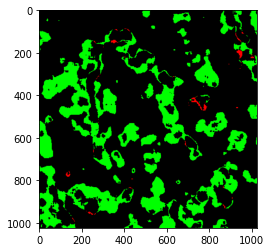

In [ ]:
#True land cover chnage loss
plt.imshow(rgb_land_cover_2016[4])

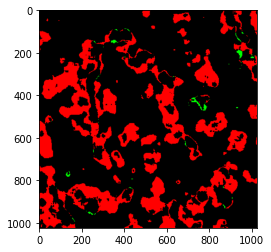

In [ ]:
#True land cover chnage gain
plt.imshow(rgb_land_cover_2019[4])

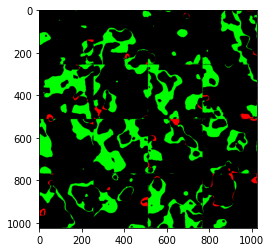

In [ ]:
#Predicted land cover chnage loss
plt.imshow(rgb_land_cover_2016_pred[4])

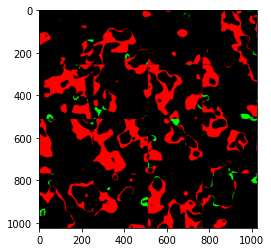

In [ ]:
#Predicted land cover chnage gain
plt.imshow(rgb_land_cover_2019_pred[4])

In [ ]:
###VISUALIZING PREDICTIONS

def visualize_img(gt_mask, pr_mask):
  gt_mask_cat = to_categorical(gt_mask, num_classes = 3)
  pr_mask_cat = to_categorical(pr_mask, num_classes = 3)
  #print(gt_mask_cat.shape)
  gt_mask_new = np.zeros((1024,1024,3), dtype = 'int16')
  pr_mask_new = np.zeros((1024,1024,3), dtype = 'int16')
  #print(gt_mask_new.shape)
  gt_mask_new[:,:,0] = gt_mask_cat[:,:,2]
  gt_mask_new[:,:,1] = gt_mask_cat[:,:,1]
  gt_mask_new[:,:,2] = gt_mask_cat[:,:,0]

  pr_mask_new[:,:,0] = pr_mask_cat[:,:,2]
  pr_mask_new[:,:,1] = pr_mask_cat[:,:,1]
  pr_mask_new[:,:,2] = pr_mask_cat[:,:,0]

  gt_mask_new[np.where(gt_mask_new == 1)] = 255
  pr_mask_new[np.where(pr_mask_new == 1)] = 255
  return gt_mask_new, pr_mask_new

In [ ]:
gt_mask_vis, pr_mask_vis = visualize_img(full_gt_mask_list[72], full_pr_mask_list[72])

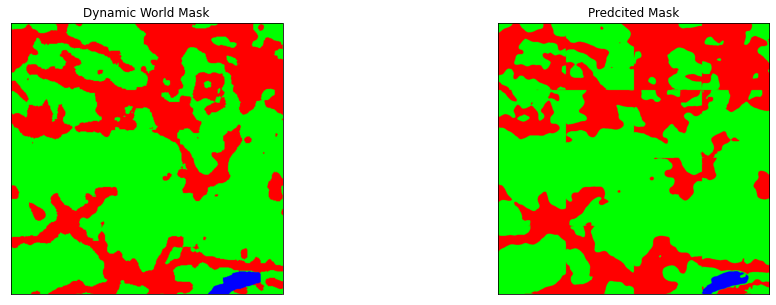

In [ ]:
visualize( 
        Dynamic_World_Mask=gt_mask_vis, 
        Predcited_Mask=pr_mask_vis
    )